 ## <font color = blue>Bike Sharing Case Study</font>

### <font color = blue> Problem Statement: </font>

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

The company wants to know:

1.  <font color = red> **Which variables are significant in predicting the demand for shared bikes** </font>
2.  <font color = red> **How well those variables describe the bike demands** </font>

### <font color = blue> Step 1: Reading and Understanding Data </font>

In [245]:
import warnings
warnings.filterwarnings('ignore')

In [246]:
import numpy as np
import pandas as pd

In [247]:
bikesharing = pd.read_csv("/Users/I500955/Documents/PG/BikeSharing/day.csv")

In [248]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [249]:
bikesharing.shape

(730, 16)

In [250]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [251]:
# No null or missing values. Hence dropping of rows or columns not needed.
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### <font color = blue> Step 2: Visualising the Data / EDA </font>

We'll visualise our data using `matplotlib` and `seaborn`.

We will check
1. if building linear regression model helps here
2. Identify if any predictors have strong association with target variable

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualising Numeric Variables

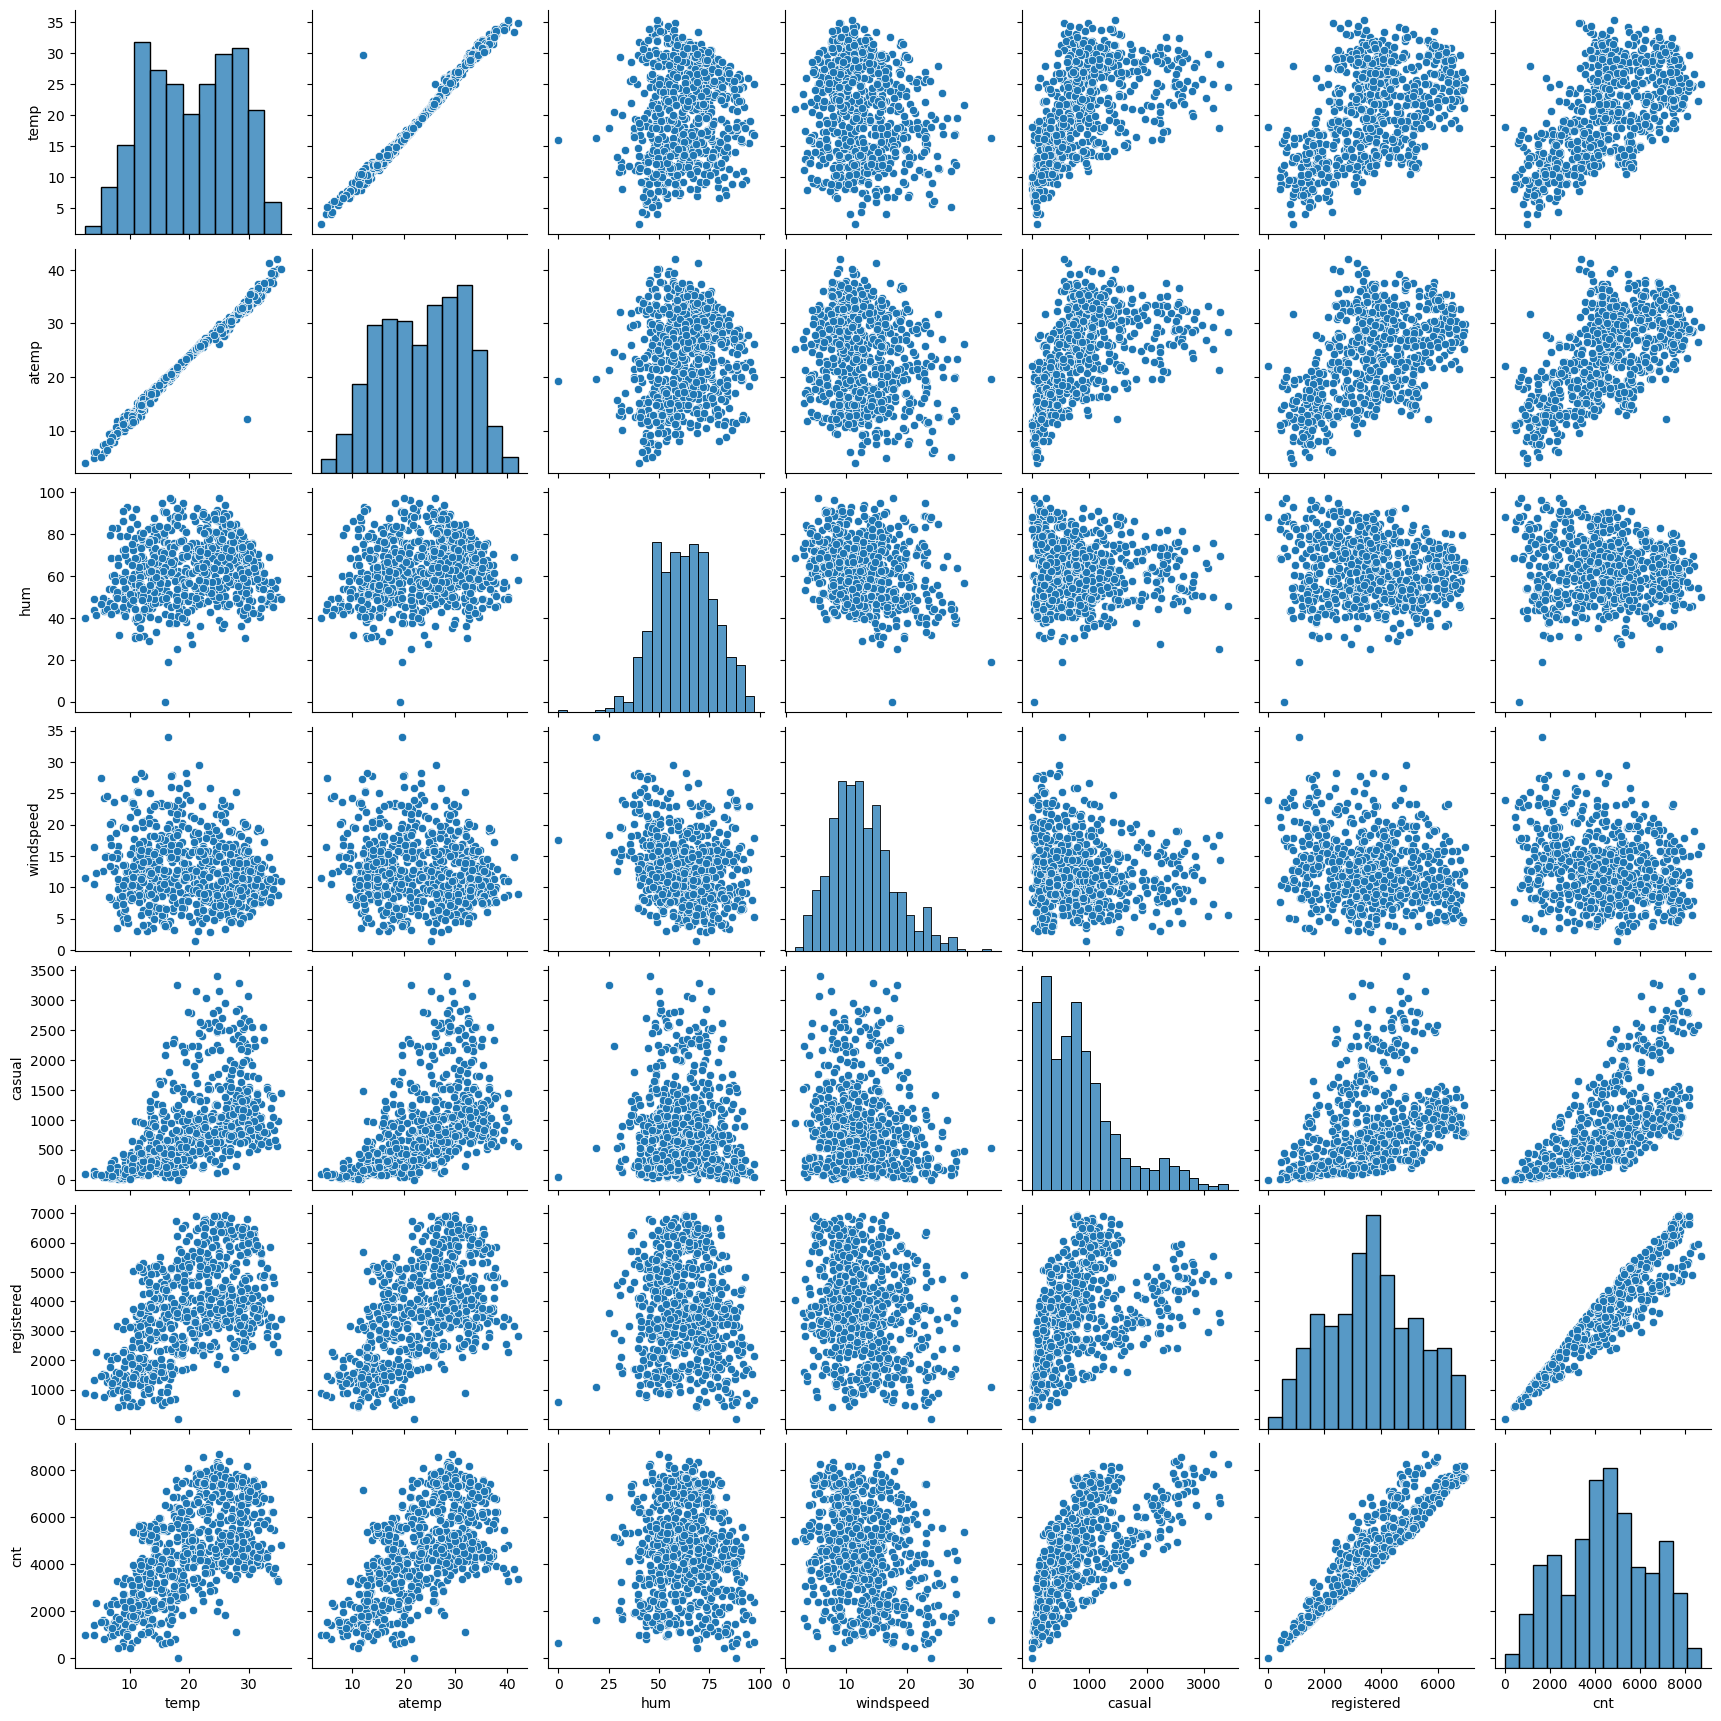

In [253]:
num_vars = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
sns.pairplot(bikesharing[num_vars])
plt.show()

When we look at temp(Y-axis) and cnt(X-axis), there seems to be some good positive correlation. Same is the case with `atemp` At least some of the variance in cnt seems to be explained by `temp` and `atemp`. 

From this plot, we can conclude that opting for a linear regression model indeed seems to be appropriate.

### Visualising Categorical Variables

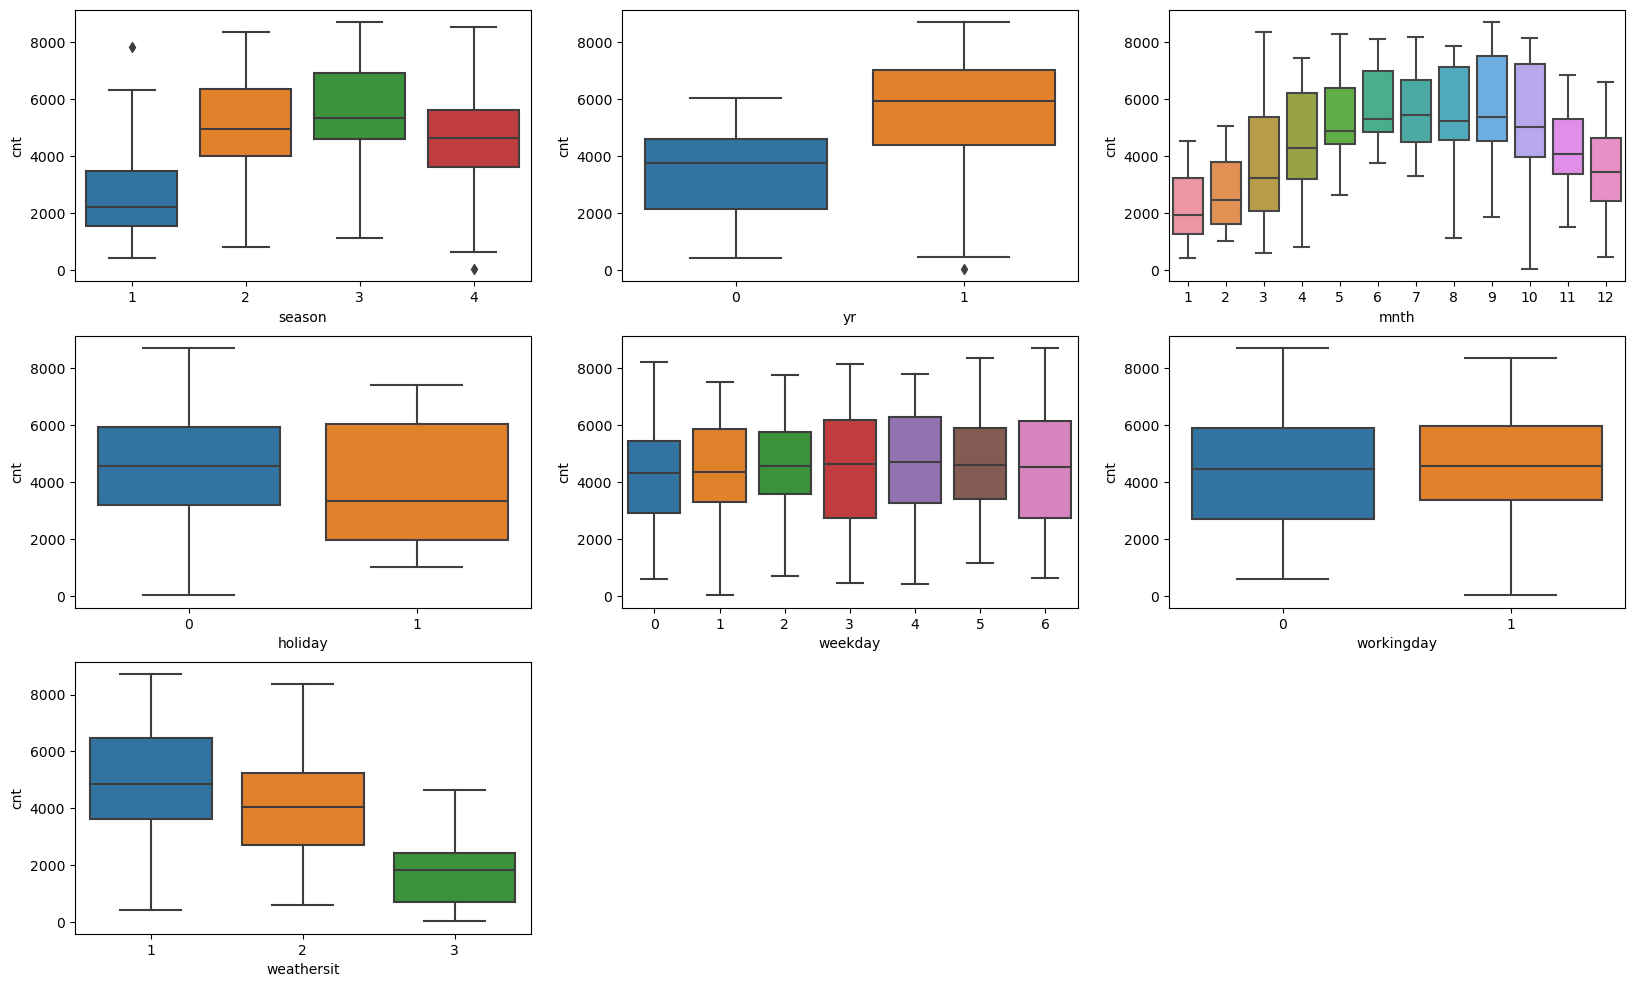

In [254]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.show()

### Inferences drawn:
- The demand for shared bikes seem to peak in the season of `fall`.
- The bike sharing systems are slowly gaining popularity as we can see `cnt` has increased from `2018` to `2019`
- Demand also seems to spike at the end of `Quarter 3` and beginning of `Quarter 4` i.e., months of `Aug`, `Sep` and `Oct`
- The quartiles seem to have higher values on non-holidays compared to `holiday`.
- Demand seems to peak on `Wednesdays` and `Saturdays`
- Demand seems to be higher on `non-working` days
- As weather changes from `1:Clear Skies` to `2:Hazy` to `3:Showers` demand seems to decrease as expected. People don't go out when its cloudy or raining outside.

### <font color = blue> Step 3: Data Preparation </font>

### Removing unwanted columns

- instant - unique values, doesnt value add anything.
- dteday  - redundant information. weekday, month and year info are already captured.
- casual  - causes perfect mutlicollinearity, as it directly contributes to target variable 'cnt'. 
- registered - causes perfect mutlicollinearity, as it directly contributes to target variable 'cnt'. 

In [255]:
bikesharing.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)

### Handling Categorical Variables

1. `season`
- categorical variable represented as integer. 
- Has 4 values 1:spring, 2:summer, 3:fall, 4:winter
- To fit linear regression line, we need to do dummy encoding and get 3 dummy variables season_summer, season_fall, season-winter for representing the same. Spring is when all these 3 are 0.



In [256]:
bikesharing = pd.get_dummies(bikesharing, columns=['season'], prefix='season', drop_first=True)
bikesharing.rename(columns={'season_2': 'season_summer', 'season_3': 'season_fall', 'season_4': 'season_winter'}, inplace=True)

2. similarly `month`, `weekday` and `weathersit` 
- all 3 categorical variables represented as integer. 
- To fit linear regression line, we need to do dummy encoding.

In [257]:
bikesharing = pd.get_dummies(bikesharing, columns=['mnth'], prefix='mnth', drop_first=True)

In [258]:
bikesharing = pd.get_dummies(bikesharing, columns=['weekday'], prefix='day', drop_first=True)

In [259]:
bikesharing = pd.get_dummies(bikesharing, columns=['weathersit'], prefix='weather', drop_first=True)
bikesharing.rename(columns={'weather_2': 'weather_2_hazy', 'weather_3': 'weather_3_showers', 'weather_4': 'weather_4_severe'}, inplace=True)

In [260]:
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_11,mnth_12,day_1,day_2,day_3,day_4,day_5,day_6,weather_2_hazy,weather_3_showers
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


### <font color = blue> Step 4: Splitting the Data into Training and Testing Sets </font>

In [261]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikesharing, train_size = 0.7, test_size = 0.3, random_state = 100)

Now, we rescale the variables. It helps improve the performance, convergence, and interpretability of linear regression models by ensuring that the features are all on a similar scale.

In [262]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [263]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_11,mnth_12,day_1,day_2,day_3,day_4,day_5,day_6,weather_2_hazy,weather_3_showers
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


In [264]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_11,mnth_12,day_1,day_2,day_3,day_4,day_5,day_6,weather_2_hazy,weather_3_showers
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- We see now the variables have scaled and max across all the variables is 1.

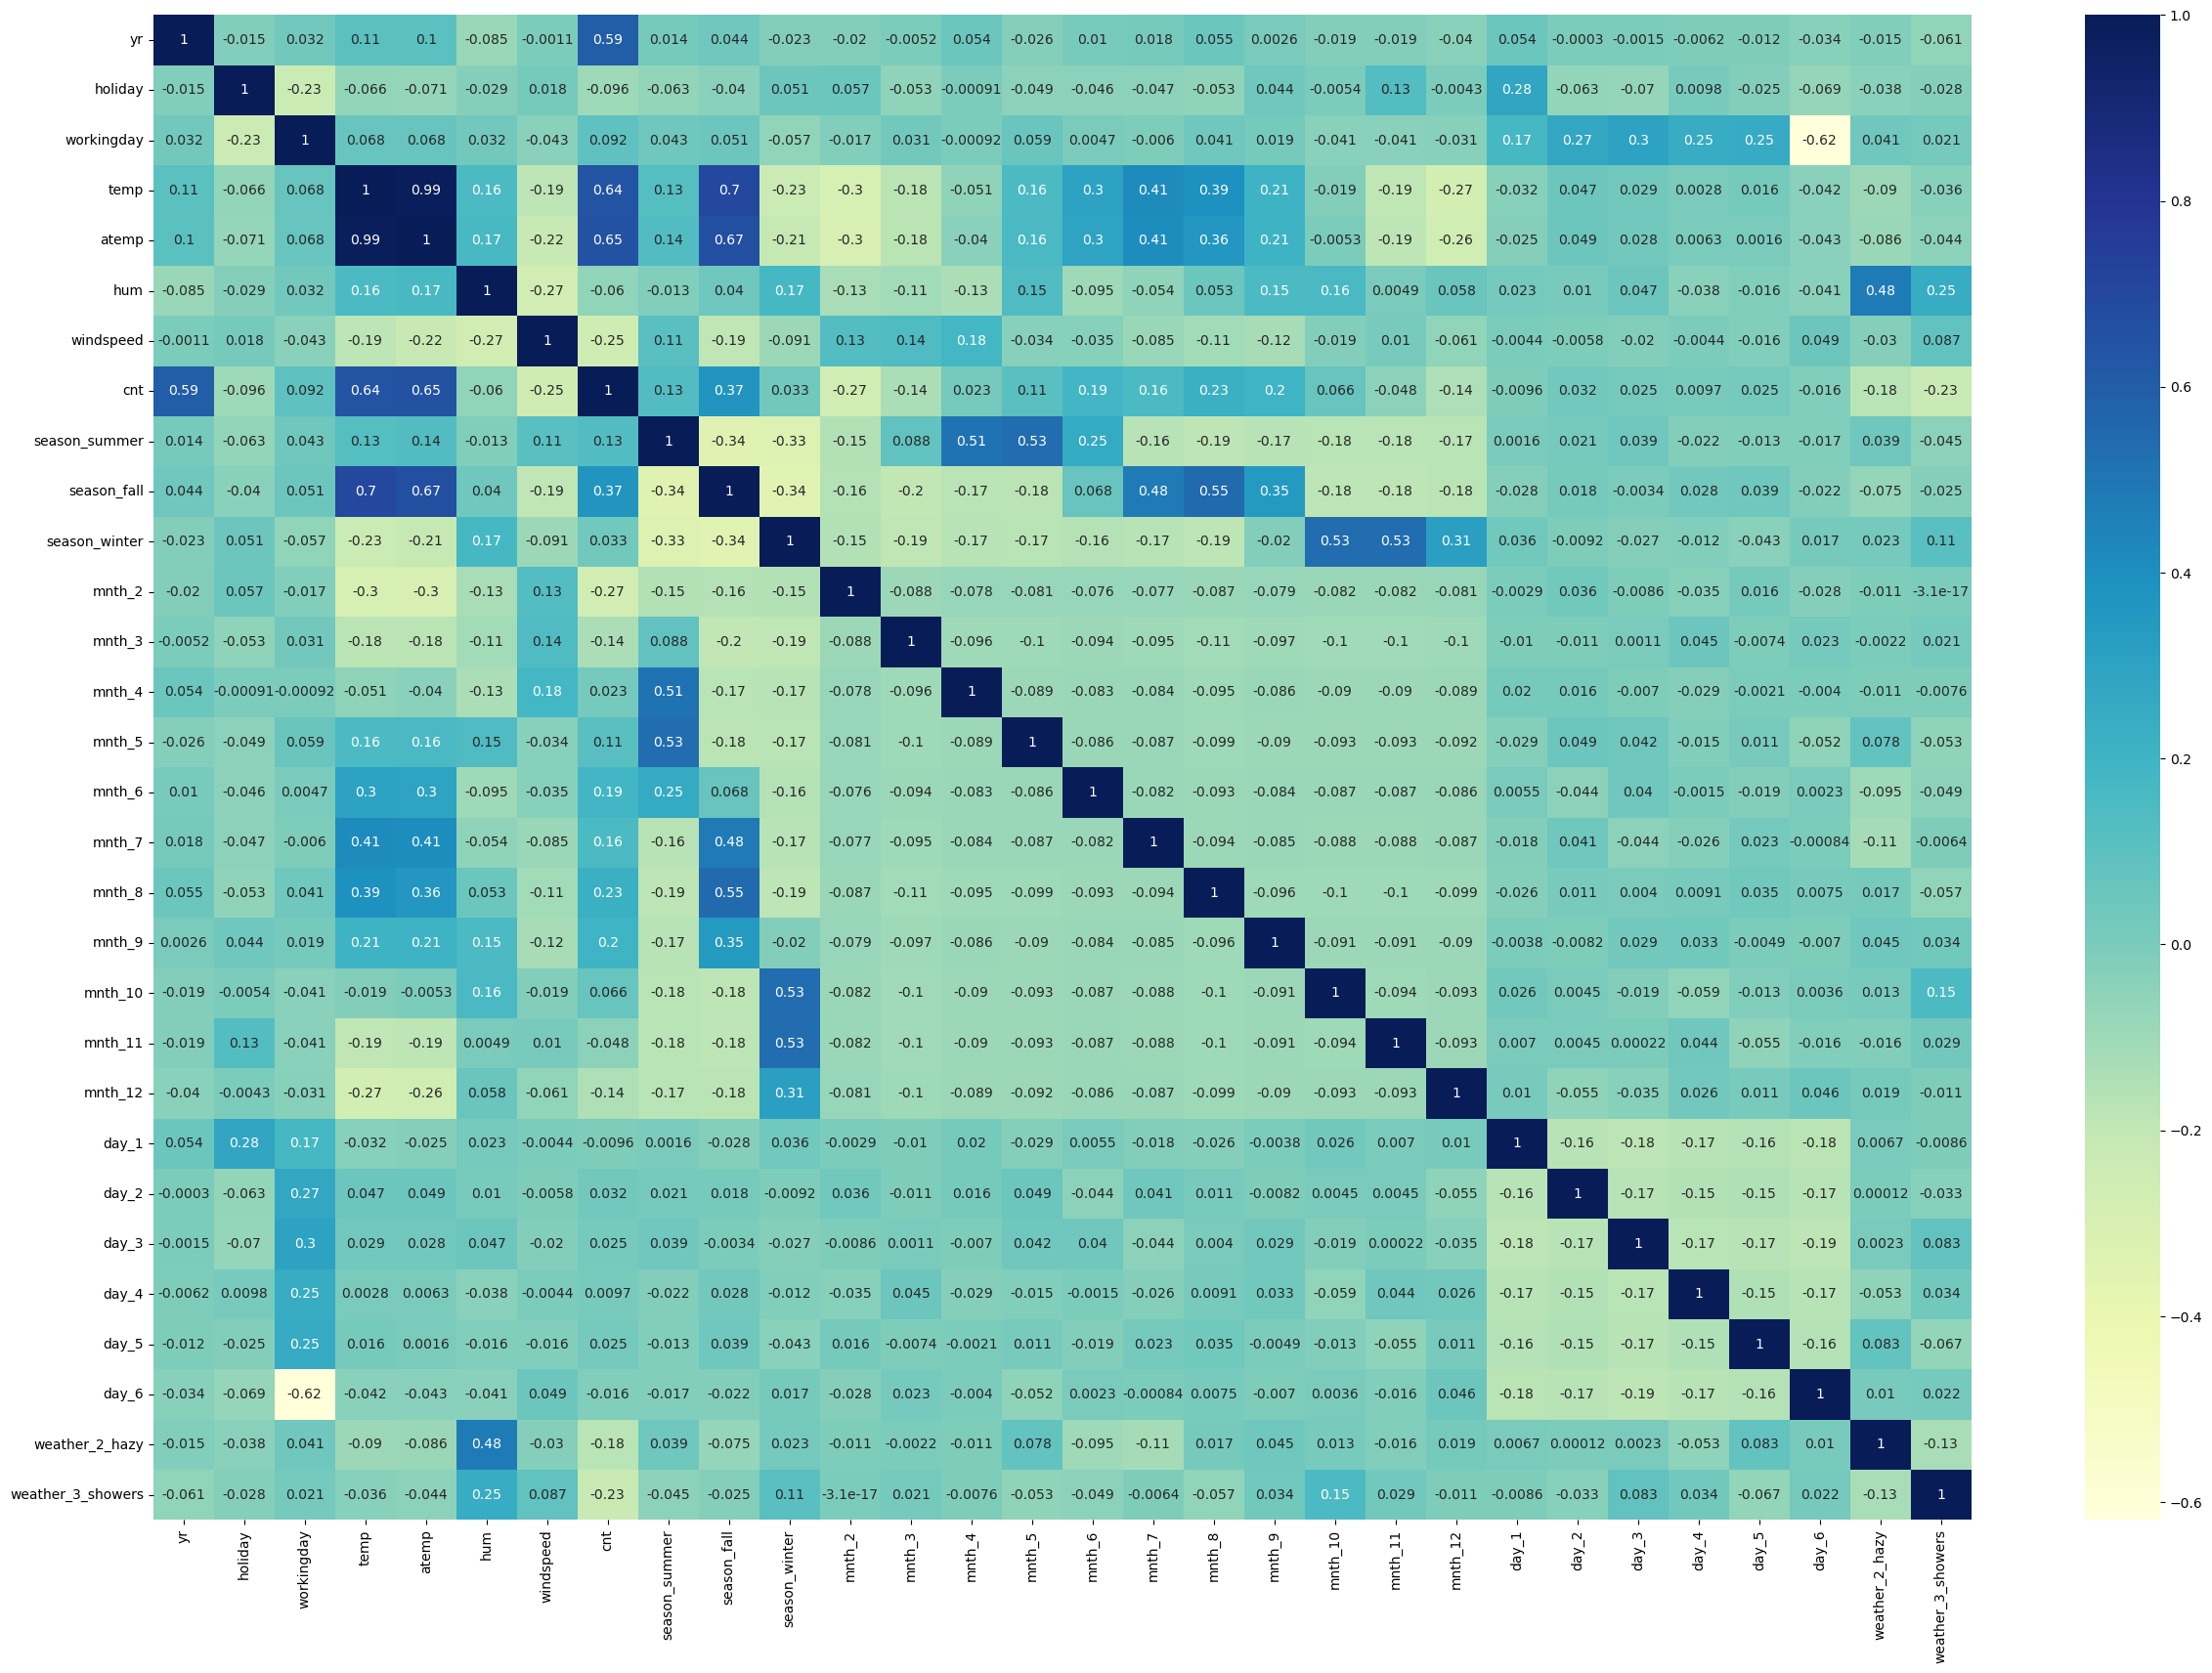

In [265]:
plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- We see that target variable `cnt` has really good correlation with `atemp`, `temp`, `year` and `season_fall`
- Also, we notice high correlation value between independent variables `temp` and `atemp`, a sign of multicollinearity. We might end up dropping one of them.

### Dividing into X and Y sets for the model building

In [266]:
y_train = df_train.pop('cnt')
X_train = df_train

### <font color = blue> Step 5: Using RFE to select most relevant subset of predictor variables </font>

Instead of opting for manual approach from start till end, we will be using "**Recursive Feature Elimination(RFE)**" for automated variable selection. 

Also, to determine optimal value for `n_features_to_select` we will be using Cross Validation Scores. 
> Cross-validation helps in selecting the best number of features that result in the best generalization performance of the model on unseen data

In [267]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()

n_features_to_select_values = [5, 10, 15, 20, 25]

cv_scores = []

for n_features_to_select in n_features_to_select_values:
    # Initialize RFE with the current n_features_to_select
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    
    # Apply cross-validation
    scores = cross_val_score(rfe, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Append the average score to cv_scores
    cv_scores.append(-scores.mean())  # Convert negative MSE to positive
    
# Find the index of the best score
best_index = cv_scores.index(min(cv_scores))

print("Optimal n_features_to_select:", n_features_to_select_values[best_index])

Optimal n_features_to_select: 20


So we will be passing `n_features_to_select` as 20

In [268]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE using the value we found for optimal n_features_to_select
rfe = RFE(estimator=lm, n_features_to_select=20)   

rfe = rfe.fit(X_train, y_train)

In [269]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 3),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 4),
 ('mnth_12', False, 5),
 ('day_1', False, 6),
 ('day_2', False, 7),
 ('day_3', False, 9),
 ('day_4', False, 10),
 ('day_5', False, 8),
 ('day_6', True, 1),
 ('weather_2_hazy', True, 1),
 ('weather_3_showers', True, 1)]

In [270]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'mnth_10', 'day_6',
       'weather_2_hazy', 'weather_3_showers'],
      dtype='object')

### <font color = blue> Step 6: Building LR model </font>

In [271]:
X_train_rfe = X_train[col]

In [272]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [273]:
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.5
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          4.51e-188
Time:                        22:23:09   Log-Likelihood:                 525.37
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1905      0.02

In [274]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,411.62
4,atemp,376.14
5,hum,18.24
8,season_fall,9.10
7,season_summer,7.45
2,workingday,5.09
6,windspeed,4.33
12,mnth_5,3.75
11,mnth_4,3.35
9,season_winter,3.25


We will now try to improve the model by dropping features that are least helpful in prediction. 

We do this by looking at p-value that measures the significance of individual predictor variables and their relationship with the response variable.

- __p-value <= 0.05__ - implies that the predictor variable is likely to be significant and can be __included__ in the model.
- __p-value > 0.05__ - implies that the predictor variable is not statistically significant in explaining the variability in the response variable and can be __dropped__.

One more measure we look at is VIF or Variance Inflation that detects multicollinearity between 2 or more predictor variables. Because highly correlated predictors can lead to issues in interpreting the model's coefficients and making accurate predictions. 

- A VIF value of __1__ indicates no multicollinearity and can be __included__ in the model.
- VIF values between __1 and 5__ are generally considered acceptable and can be therefore __included__ in the model.
- VIF values above __5 or 10__ suggest high multicollinearity and hence needs to be __dropped__ from model.


Therefore, we will build the model as below:

    1. Low p-value and Low VIF : we include in the model
	2. High p-value and High VIF : we should definitely drop this
	3. High P, Low VIF : we will drop these first
       Low P, High VIF : we will remove these next
 

### Model 2 : Dropping atemp with High p-value and High VIF 

`temp` and `atemp` are highly correlated. From business perspective, though `atemp` is an important predictor it can be dropped since we still have `temp`.

In [275]:
X = X_train_rfe.drop('atemp', 1)

In [276]:
X_train_lm = sm.add_constant(X)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.2
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          3.75e-189
Time:                        22:23:09   Log-Likelihood:                 525.34
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1908      0.02

In [277]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.24
4,hum,17.98
7,season_fall,9.03
6,season_summer,7.45
2,workingday,5.09
5,windspeed,4.13
11,mnth_5,3.75
10,mnth_4,3.34
8,season_winter,3.24
12,mnth_6,2.45


### Model 3 : Dropping mnth_6 with High p-value 

In [278]:
X = X.drop('mnth_6', 1)

In [279]:
X_train_lm = sm.add_constant(X)
lm_3 = sm.OLS(y_train, X_train_lm).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.7
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.30e-189
Time:                        22:23:09   Log-Likelihood:                 523.80
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1925      0.02

In [280]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,25.37
4,hum,17.64
7,season_fall,8.86
6,season_summer,5.82
2,workingday,5.09
5,windspeed,4.13
8,season_winter,3.14
11,mnth_5,2.30
10,mnth_4,2.26
16,weather_2_hazy,2.15


### Model 4 : Dropping mnth_4 with High p-value 

In [281]:
X = X.drop('mnth_4', 1)

In [282]:
X_train_lm = sm.add_constant(X)
lm_4 = sm.OLS(y_train, X_train_lm).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.8
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.51e-190
Time:                        22:23:09   Log-Likelihood:                 523.36
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     492   BIC:                            -934.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1944      0.02

In [283]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.83
4,hum,17.60
7,season_fall,8.80
2,workingday,5.09
5,windspeed,4.00
6,season_summer,3.73
8,season_winter,3.14
15,weather_2_hazy,2.15
0,yr,2.05
14,day_6,1.92


### Model 5 : Dropping mnth_5 with High p-value 

In [284]:
X = X.drop('mnth_5', 1)

In [285]:
X_train_lm = sm.add_constant(X)
lm_5 = sm.OLS(y_train, X_train_lm).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.2
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          4.93e-191
Time:                        22:23:09   Log-Likelihood:                 521.82
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1888      0.02

In [286]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.19
4,hum,17.54
7,season_fall,8.53
2,workingday,5.09
5,windspeed,3.94
6,season_summer,3.51
8,season_winter,3.08
14,weather_2_hazy,2.15
0,yr,2.04
13,day_6,1.92


### Model 6 : Dropping season_fall with High p-value </font>

In [287]:
X = X.drop('season_fall', 1)

In [288]:
X_train_lm = sm.add_constant(X)
lm_6 = sm.OLS(y_train, X_train_lm).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.0
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.47e-191
Time:                        22:23:09   Log-Likelihood:                 520.35
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     494   BIC:                            -940.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1894      0.02

In [289]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.79
3,temp,10.17
2,workingday,5.09
5,windspeed,3.91
7,season_winter,2.35
13,weather_2_hazy,2.14
0,yr,2.03
12,day_6,1.92
6,season_summer,1.83
11,mnth_10,1.62


### Model 7 : Dropping mnth_3 with High p-value 

In [290]:
X = X.drop('mnth_3', 1)

In [291]:
X_train_lm = sm.add_constant(X)
lm_7 = sm.OLS(y_train, X_train_lm).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          3.24e-192
Time:                        22:23:09   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1945      0.02

In [292]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
7,season_winter,2.27
12,weather_2_hazy,2.14
0,yr,2.03
11,day_6,1.90
6,season_summer,1.83
10,mnth_10,1.62


###  Model 8 : Dropping hum with High VIF 

p-values are all < 0.05. When we look at VIF values, hum has the highest and hence needs to be dropped.

In [293]:
X = X.drop('hum', 1)

In [294]:
X_train_lm = sm.add_constant(X)
lm_8 = sm.OLS(y_train, X_train_lm).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          6.16e-189
Time:                        22:23:09   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0945      0.01

In [295]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,season_winter,2.02
5,season_summer,1.82
10,day_6,1.77
9,mnth_10,1.62
7,mnth_8,1.59
11,weather_2_hazy,1.54


`temp` has high VIF and ideally should be the next one to be dropped. 
But in correlation heat map, we saw that `temp` and `atemp` had good correlation with `cnt`. Also they are important in business terms, outgoing activities do get impacted by temperature. Since we have already dropped `atemp`, we can't risk dropping `temp`. 

Looking at other features, except for `temp` rest have ideal VIF < 5. If we look at p-values, holiday has 0.048 approx 0.05. But it seems redundant since we also have working day and week days in the model.

### Model 9 : Dropping Holiday with High p-value </font>

In [296]:
X = X.drop('holiday', 1)

In [297]:
X_train_lm = sm.add_constant(X)
lm_9 = sm.OLS(y_train, X_train_lm).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.86e-189
Time:                        22:23:09   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0856      0.01

In [298]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.26
1,workingday,4.07
3,windspeed,3.49
0,yr,2.02
5,season_winter,1.99
4,season_summer,1.82
9,day_6,1.70
8,mnth_10,1.61
6,mnth_8,1.59
10,weather_2_hazy,1.54


Dropping more variables with p-value > 0 to see if we get a better model where temp and all other features have ideal VIF

###  Model 10 : Dropping mnth_10 with High p-value </font>

In [299]:
X = X.drop('mnth_10', 1)

In [300]:
X_train_lm = sm.add_constant(X)
lm_10 = sm.OLS(y_train, X_train_lm).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.00e-189
Time:                        22:23:10   Log-Likelihood:                 504.10
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     498   BIC:                            -933.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0813      0.01

In [301]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,season_summer,1.81
8,day_6,1.69
6,mnth_8,1.58
9,weather_2_hazy,1.54
5,season_winter,1.51
7,mnth_9,1.30


### Model 11 : Dropping mnth_8 with High p-value 

In [302]:
X = X.drop('mnth_8', 1)

In [303]:
X_train_lm = sm.add_constant(X)
lm_11 = sm.OLS(y_train, X_train_lm).fit()
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.47e-188
Time:                        22:23:10   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0753      0.01

In [304]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,day_6,1.69
4,season_summer,1.57
8,weather_2_hazy,1.53
5,season_winter,1.40
6,mnth_9,1.20
9,weather_3_showers,1.08


> ___Finally, we have model with ideal p-values and VIF values. So, we go ahead and make our predictions using this model.___

### <font color = blue> Step 7: Residual Analysis of Training Data </font>

Examining the residuals, difference between the observed and predicted values of the response variable.

We validate linear regression assumptions using these residuals.
1. Validate if residual error terms are normally distribute and centered around 0
2. Validate if residual error terms are independent of each other
3. Validate if residual error terms have constant variance or deviation (homoscedasticity)

In [305]:
y_train_cnt = lm_11.predict(X_train_lm)

Text(0.5, 0, 'Errors')

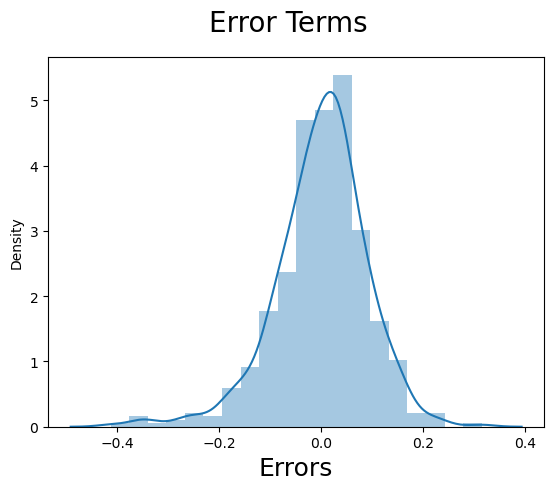

In [306]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

> As we can see in the plot above, residuals are indeed normally distributed

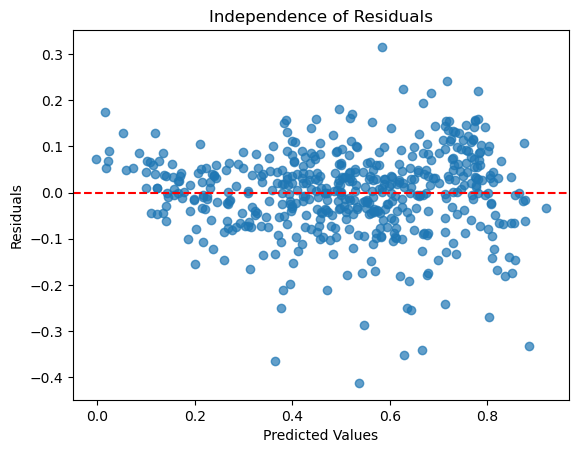

In [307]:
residuals = y_train - y_train_cnt

# Plot residuals against predicted values
plt.scatter(y_train_cnt, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Independence of Residuals')
plt.show()

> As we can see residuals are indeed independent of each other
>> Also, we see the error terms have mostly constant variance or deviation. The data points are spread across equally without a prominent pattern, it means the residuals have constant variance (homoscedasticity). No funnel-shaped pattern depicting non-constant variance is seen.

### <font color = blue> Step 8: Making Predictions Using the Final Model </font>

Applying scaling on the test sets

In [308]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [309]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_11,mnth_12,day_1,day_2,day_3,day_4,day_5,day_6,weather_2_hazy,weather_3_showers
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [310]:
y_test = df_test.pop('cnt')
X_test = df_test

In [311]:
finalCols = X.columns

# Creating X_test dataframe by dropping variables from X_test
X_test = X_test[finalCols]

In [312]:
X_test_lm11 = sm.add_constant(X_test)

y_pred = lm_11.predict(X_test_lm11)

###  <font color = blue> Step 9: Model Evaluation </font>

Text(0, 0.5, 'y_pred')

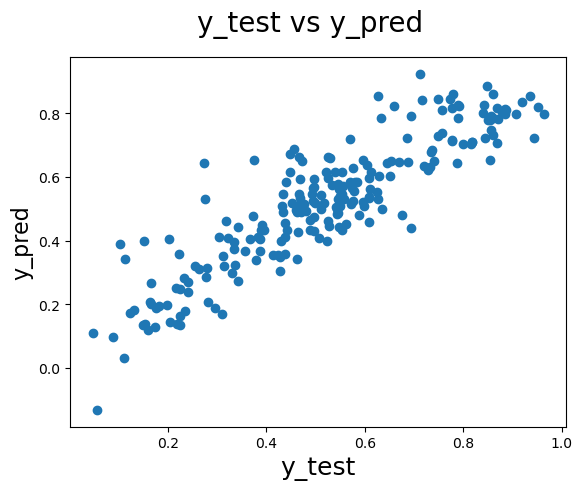

In [313]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [314]:
lm_11.params

const                0.075325
yr                   0.233056
workingday           0.056323
temp                 0.549936
windspeed           -0.155238
season_summer        0.087429
season_winter        0.131826
mnth_9               0.097236
day_6                0.067688
weather_2_hazy      -0.081347
weather_3_showers   -0.288021
dtype: float64

We can see that the equation of our best fitted line is:

cnt = _0.075325_ + (__yr__ × _0.233056_) + (__workingday__ × _0.056323_) + (__temp__ × _0.549936_) + (__windspeed__ × _−0.155238_) + (__season_summer__ × _0.087429_) + (__season_winter__ × _0.131826_) + (__mnth_9__ × _0.097236_) + (__day_6__ × _0.067688_) + (__weather_2_hazy__ × _−0.081347_) + (__weather_3_showers__ × _−0.288021_)


### <font color="blue"> Model Performance using R-squared score, MSE and RMSE  </font>

In [315]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7955844377237249

In [316]:
r2=0.7955844377237249

In [317]:
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7857567664604425

In [318]:
from sklearn.metrics import mean_squared_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.009708882328806265
Root Mean Squared Error (RMSE): 0.09853366089213506


<font color="green">

- R-square of training set: __0.836__
- Adjusted R-square of training set: __0.832__

- R-square of testing set: __0.795__
- Adjusted R-square of testing set: __0.785__
    
- Mean Squared Error (MSE): __0.0097__
- Root Mean Squared Error (RMSE): __0.098__
</font>

### <font color="blue"> Final Interpretation of model </font>

The linear regression model aimed to capture the relationship between the target variable "cnt" and several predictor variables. The model's primary goal was to provide accurate predictions of bike rental counts based on weather conditions, time-related factors, and other relevant features.

#### Model Performance

`The model's performance metrics include a low Mean Squared Error (MSE) of 0.0097 and a Root Mean Squared Error (RMSE) of 0.0985, indicating that the model's predictions are generally close to the actual values.`

`The R-square values provide insights into the amount of variance in the dependent variable that is explained by the independent variables. The R-square of 0.836 for the training set and 0.795 for the testing set suggest that around 83.6% and 79.5% of the variance in 'cnt' is explained by the predictors included in the model, respectively.`

`The Adjusted R-square values take into account the number of features and the complexity of the model. The Adjusted R-square of 0.832 for the training set and 0.785 for the testing set show that the model retains its explanatory power even after accounting for the number of features.`

Hence, this is a good model demonstrating reasonably good fit to the data.

#### Features importance

Positive coefficients indicate a positive relationship with the target variable, while negative coefficients suggest a negative relationship.

As per our final model, **top 3 features** that are significant in predicting demand for shared bikes are:

1. __Temperature (temp)__ : One unit increase in temp variable increases the bike rental count by 0.5636 units. Higher temperatures are associated with higher bike rental counts.

2. __Weather (weathersit 3: weather_3_showers)__ : Compared to reference category weathersit 1, one unit increase in weathersit 3 variable decreases bike rental count by 0.288 units. Presence of showers (weathersit 3) is associated with lower bike rental counts.

3. __Year (yr)__ : One unit increase in year variable increases the bike rental count by 0.233 units. Bike rental counts have increased over the years.

Impact of other predictors are as below:

4. __Wind Speed (windspeed)__ : One unit increase in windspeed variable decreases bike rental count by 0.155 units. Higher wind speeds are more challenging and leads to lower bike rentals.

5. __Winter Season (season_winter)__ : Compared to reference category Season 1 Spring, one unit increase in season 4 i.e., winter variable increases bike rental count by 0.131 units. Might be due to favourable weather conditions in some parts during winter.

6. __September (mnth_9)__ : Compared to reference category Jan, one unit increase in September, mnth_9 increases bike rental count by 0.097 units 

7. __Summer Season (season_summer)__ : Compared to reference category Season 1 Spring, one unit increase in season 2 i.e., Summer variable increases bike rental count by 0.087 units. Summer is generally favourable for outdoor activities.

8. __Weather (weathersit 2: weather_2_hazy)__ : Compared to reference category weathersit 1, one unit increase in weathersit 2 variable decreases bike rental count by 0.08 units. Presence of mist and clouds (weathersit 2) is associated with lower bike rental counts.

9. __Weekday 6 (day_6)__ : Compared to reference category Weekday 0 i.e, Sunday, one unit increase in weekday 6 variable increases bike rental count by 0.067 units. Generally people tend to go out on weekends, that explains the increase.

10. __Working day (workingday)__ : One unit increase in workingday variable increases the bike rental count by 0.056 units. More people use bikes to go to office on working days.

11. __const__ : When no other predictor variables are present, bike rentals can still increase by 0.07 units